Incomplete:

* I'm not sure I'm adapting the code correctly. 
* When looking for the distribution of extremes, I'm getting entirely different histograms every time I run the above code. Sometimes it looks almost normal (which I'd expect), with a range of 2 to 17, and sometimes it's clustered around one value, ranging from -0.6 to 0.6. This alternates on every other run. 

# Unit 4 Lesson 9: Other Algorithms and Course Wrapup
#### Estimated time 3 - 4 hours

The field of data science is broad with many different topics, only a handful of which we were able to cover to any depth in this course. In this lesson, we'll be briefly touching on a few topics so that you're familiar with them, but won't ask you to complete any exercises specific to these topics. You're encouraged to explore these on your own, particularly if they interest you either personally or professionally. You should always be growing your skills and challenging yourself to learn new things. It's how you stay relevant in a field that's constantly changing. 

### Goals
* Perform a Monte Carlo simulation in Python.
* Learn how to implement Artificial Neural Networks in Python.
* Understand other topics in data science not covered in this course.

## Unit 4 Lesson 9 Project 1
#### Estimated time 1-2 hours

The Monte Carlo method is an approach to understanding the results of a random process or group of random processes. The intuition behind a Monte Carlo (MC) simulation is simple, though the implementation can be tricky. Still, the MC approach is well worth understanding, since it's often the simplest way to explore complicated outcomes driven by a series of random events.

The MC approach is to model the possible outcomes of a random process using a computer simulation and run that simulation a number of times. The results of these simulations will then give you an understanding of the possible outcomes of the process, often in terms of the distributions of certain outcomes or group of outcomes.

To illustrate, let us take the example of flipping a coin. If we wanted to understand the outcome of flipping a coin a number of times, we could calculate out the expectations of the process using some basic probability laws. So, if we flip a coin 10 times, the chance we get four heads is combination(10,4) * .5 or around .21.

We could also flip a coin 10 times to see how many times we got heads. We could then repeat this empirical experiment a number of times (since the outcome is random) and see what the probability of four heads converges to.

But we can take this an empirical step further and rather than physically flipping the coin, we get a computer to simulate the flipping of a coin. Computers can generate random numbers using a function like those found in the "random" library in Python. For example, the function:

In [2]:
import random
x=random.random()

will return a random value (uniformly distributed) between 0 and 1. We can run this code multiple times to get a series of random values for x. 

In [3]:
for _ in range (10):
    print(random.random())

0.6589744623819405
0.4223272862430608
0.8803858620737304
0.6800528222464234
0.7923043921989994
0.9620264547342366
0.4548070183499777
0.021865229523232887
0.5694134899111478
0.07137746669491918


We can then compile the results of this iterative generation of random numbers to get all sorts of measures of the possible outcomes: sums, averages, distributions, and so on.

If we wrap the random function in an "clause" so that any value above .5 returns a value of "tail" (and if not it returns "head"), we have essentially simulated the flipping of a coin. 

In [4]:
for _ in range(10):
    if(random.random() < .5):
        print("head")
    else:
        print("tail")

tail
head
head
tail
tail
tail
head
head
head
head


Let us build on the above example to create a more in-depth simulation.

We're going to use the opportunity to demonstrate an entire Python module and a simple class of object. Objects combine data with functionality. They are most appropriate when you have multiple objects that may have relationships with each other. Thus, for simple coins this is a little bit of overkill, but hopefully this will be helpful in understanding objects.

You can call this file `flipcoins.py`:

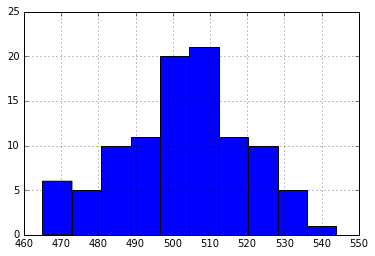

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

'''This script demonstrates simulations of coin flipping'''
import random

# let's create a fair coin object that can be flipped:

class Coin(object):
    '''this is a simple fair coin, can be pseudorandomly flipped'''
    sides = ('heads', 'tails')
    last_result = None

    def flip(self):
        '''call coin.flip() to flip the coin and record it as the last result'''
        self.last_result = result = random.choice(self.sides)
        return result

# let's create some auxilliary functions to manipulate the coins:

def create_coins(number):
    '''create a list of a number of coin objects'''
    return [Coin() for _ in range(number)]

def flip_coins(coins):
    '''side effect function, modifies object in place, returns None'''
    for coin in coins:
        coin.flip()

def count_heads(flipped_coins):
    return sum(coin.last_result == 'heads' for coin in flipped_coins)

def count_tails(flipped_coins):
    return sum(coin.last_result == 'tails' for coin in flipped_coins)


def main():
    coins = create_coins(1000)
    dist = []
    for i in range(100):
        flip_coins(coins)
#         print(count_heads(coins))
        n = count_heads(coins) # Mine
        dist.append(n)
    
    pd.Series(dist).hist() # Mine
    plt.show()  # Mine

if __name__ == '__main__':
    main()

We can run this script located in the same directory in with the following:

`$ python flipcoins.py`

When we run the script, the module's `__name__` will be the `__main__` module, and so the `main()` function will be called. The main function will create 1000 simulated coins. It will then simulate flipping them all 100 times, and then print out the number of them that came up heads. Intuitively, this is a way to get a sense for the range and consistency of possible outcomes if in real life you had to flip a fair coin 100 times (or 100 coins).

What you'll see is that the result is a sum of random variables. The sum of random variables is a normal random variable. That is, the probability space of outcomes will be shaped like a bell curve. If we created a histogram of these outcomes, that is what we'd likely see.

This method can be used to simulate everything from flipping coins and rolling roulette wheels to the performance of portfolios over time. 

### Challenge

* Modify the above program to generate trials of a normal variable. How does this distribution look different than the coin-flipping example? What should it look like?


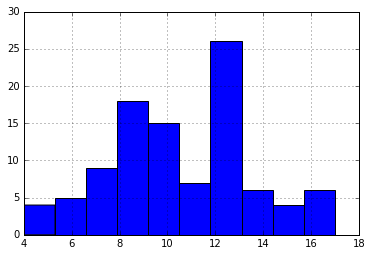

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

'''This script demonstrates simulations of coin flipping'''
import random
from scipy.stats import truncnorm

# let's create a fair coin object that can be flipped:

class Coin(object):
    '''this is a simple fair coin, can be pseudorandomly flipped'''
    sides = [str(int(n)) for n in list(truncnorm(a=0, b=1, scale=100).rvs(size=100))] # Mine (non-strings don't work?!)
    last_result = None

    def flip(self):
        '''call coin.flip() to flip the coin and record it as the last result'''
        self.last_result = result = random.choice(self.sides)
        return result

# let's create some auxilliary functions to manipulate the coins:

def create_coins(number):
    '''create a list of a number of coin objects'''
    return [Coin() for _ in range(number)]

def flip_coins(coins):
    '''side effect function, modifies object in place, returns None'''
    for coin in coins:
        coin.flip()

def count_heads(flipped_coins):
    return sum(coin.last_result == '1' for coin in flipped_coins)

def count_tails(flipped_coins):
    return sum(coin.last_result == '2' for coin in flipped_coins)


def main():
    coins = create_coins(1000)
    dist = []
    for i in range(100):
        flip_coins(coins)
#         print(count_heads(coins))
        n = count_heads(coins) # Mine
        dist.append(n) # Mine
        
    pd.Series(dist).hist() # Mine
    plt.show()  # Mine

    
if __name__ == '__main__':
    main()

* Modify the above program to track the maximum and minimum of each trial of normal variables. Run 100 simulations of these trials. What does the distribution extremes look like? What should it look like?

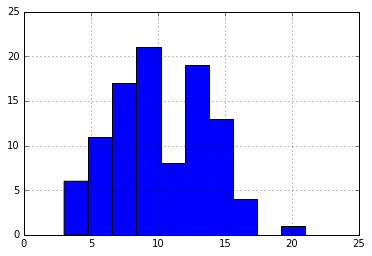

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

'''This script demonstrates simulations of coin flipping'''
import random
from scipy.stats import truncnorm

# let's create a fair coin object that can be flipped:

class Coin(object):
    '''this is a simple fair coin, can be pseudorandomly flipped'''
    sides = [str(int(n)) for n in list(truncnorm(a=0, b=1, scale=100).rvs(size=100))] # Mine (non-strings don't work?!)
    last_result = None

    def flip(self):
        '''call coin.flip() to flip the coin and record it as the last result'''
        self.last_result = result = random.choice(self.sides)
        return result

# let's create some auxilliary functions to manipulate the coins:

def create_coins(number):
    '''create a list of a number of coin objects'''
    return [Coin() for _ in range(number)]

def flip_coins(coins):
    '''side effect function, modifies object in place, returns None'''
    for coin in coins:
        coin.flip()

def count_heads(flipped_coins):
    return sum((coin.last_result == '1') or (coin.last_result == '100') for coin in flipped_coins)

def count_tails(flipped_coins):
    return sum(coin.last_result == '2' for coin in flipped_coins)


def main():
    coins = create_coins(1000)
    dist = []
    for i in range(100):
        flip_coins(coins)
#         print(count_heads(coins))
        n = count_heads(coins) # Mine
        dist.append(n) # Mine
        
    pd.Series(dist).hist() # Mine
    plt.show()  # Mine

    
if __name__ == '__main__':
    main()

I'm getting entirely different histograms every time I run the above code. Sometimes it looks almost normal (which I'd expect), with a range of 2 to 17, and sometimes it's clustered around one value, ranging from -0.6 to 0.6. This alternates on every other run. 

### Submission

Submit your code (called "`monte_carlo.py`") for the following challenges using a GitHub link in the box below.

## Unit 4 Lesson 9 Assignment 2: Introduction to Artificial Neural Networks
#### Estimated time: 1 hour

Artificial neural networks (ANN) (https://en.wikipedia.org/wiki/Artificial_neural_network) are a fascinating attempt to use the model of the human brain to categorize data. The human brain is made up of nerve cells called neurons that attach to other neurons through fiber strands called axons. Axons connect to dendrites, another fiber strand, that also connects to the neuron body. The point at which the axons and dendrites contact is the synapse. Learning in a neurological sense happens as the strength of these synaptic connections between neurons are altered for the same input.

### Perceptrons

In an artificial neural network, this structure is replicated with nodes and directed links. The most basic implementation is a perceptron, which has a layer of input nodes and an output node. The input nodes respond to the input and "signal" the output node. Each input node is the value of a particular attribute in the dataset. If the attribute is categorical, then there is a node for each possible category with the node sending input only if the category is present.

The links between the input node and the output node carry a weight (modeling the strength of a synaptic connection), which the output node uses to properly sum the inputs and arrive at a value. The response generated by the output node is based on this value but conditioned by an activation function that determines the response of the output node.

A perceptron learns by reweighting the links between the input layer and the output layer, tuning the response to achieve the desired outcome. Where all links in the perceptron start out with the same weight, as the model learns, those weights change so the activation of different input nodes will result in a different value than was previously the case.

This is done with each training instance and only for that instance, so it's easy to "unlearn" the training from a previous training iteration if the new instance is contradictory. The learning rate parameter or training threshold is used to limit training adjustments. For problems that are linearly separable (think about the Iris classification problem), the results of a perceptron are guaranteed to converge to the optimal solution, unlike problems that aren't linearly separable, in which case the perceptron won't converge on the optimal solution.

### Multilayer ANN

To better replicate the neurological structure of the brain and accomplish classification tasks that aren't linearly separable, the multilayer ANN was developed. As the name suggests, there are additional layers between the input and output layer, called hidden layers, that connect to both input nodes and the output node. In a simple feed-forward arrangement, the nodes in one layer are only connected to the nodes in the next layer so the signal travels directly from input to output. In a recurrent network, nodes can be connected to each other within a layer and to inputs in a previous layer. In this way, a more dynamic relationship between inputs and outputs can be modeled.

To train a multilayer ANN, a technique known as back-propagation is used to not only set the weights from the input to the output (as is done in the feed-forward design), but also from the output backward to the input layer. This is a much more complex process and involves estimating the relative cost at each layer and adjusting the weights accordingly to get the desired output, but the result is a function that is a universal apporximator, meaning it can learn any target function. Where previous classifiers you learned about (decision trees, logistic regression, etc.) had difficulty learning more complex decision boundaries (like a curved line), the multilayer ANN can learn these functions and classify data.

### The Activation Function and Self-Driving Cars

In the most basic implementation of the activation function, the response is based simply on the sign of the resulting summed input (+ or -), resulting in a +1 or a -1 as output based on the range of possible values calculated from the input nodes and weights. The activation function can also be a more complex function depending on the desired behavior of the output.

For example, one of the applications of ANNs is in self-driving cars. A forward-looking camera records the road and an ANN model runs on the image, with input nodes monitoring various parts of the image. The model detects the center of the lane and keeps the vehicle in its lane by taking the input from the nodes. As the vehicle begins to move out of the lane, the input nodes detect this based on the changing values in their particular area of the image and communicate to the output node, with greater weight given to nodes close to the center than the edge (if the nodes in the center "see" the shoulder, the vehicle is really off track).

For minimal values of drift from the midline, only a small amount of steering input is required to bring the vehicle back into the lane, but for large values of drift from the midline (the vehicle is going into the opposite lane or off to the shoulder), more drastic steering input is required to bring the vehicle back into the lane. In this case, the activation function is tuned to the desired response based on the summed value (more steering input based on greater distance from the center of the lane).

You can see this process in an early video showing an autonomous navigation system using a simple three-layer ANN. Take a look at this video (https://www.youtube.com/watch?v=ilP4aPDTBPE) to see how an ANN is trained. Note the multiple models being used as an ensemble, with the most confident network being used for a given situation.
Challenge

Go back through one of the classification assignments and implement a perceptron and multilayer ANN. How does this compare with what you got with the model you initially developed? Based on what you know, would ANN be a good model to use on this data? Why or why not? This exercise is for your own enrichment so enjoy, but don't feel like you have to spend much time on the task.

### Resources

* Here's a listing of machine learning packages in Python (https://wiki.python.org/moin/PythonForArtificialIntelligence#Neural_Networks) including references to packages for building neural networks.
* Here's a Quora post on the topic of the best ANN packages in Python (https://www.quora.com/What-is-the-best-neural-network-library-for-Python).
